In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
%matplotlib inline

In [74]:
data = pd.read_csv('train.csv')

In [75]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [76]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663
7738,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899
1579,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
5058,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 20 columns):
Id               7000 non-null int64
DistrictId       7000 non-null int64
Rooms            7000 non-null float64
Square           7000 non-null float64
LifeSquare       5514 non-null float64
KitchenSquare    7000 non-null float64
Floor            7000 non-null int64
HouseFloor       7000 non-null float64
HouseYear        7000 non-null int64
Ecology_1        7000 non-null float64
Ecology_2        7000 non-null object
Ecology_3        7000 non-null object
Social_1         7000 non-null int64
Social_2         7000 non-null int64
Social_3         7000 non-null int64
Healthcare_1     3642 non-null float64
Helthcare_2      7000 non-null int64
Shops_1          7000 non-null int64
Shops_2          7000 non-null object
Price            7000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.1+ MB


In [78]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,7000.000000,7000.000000,7000.000000,7000.000000,5514.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,3642.000000,7000.000000,7000.000000,7000.000000
mean,8386.061714,50.560857,1.889286,56.307485,37.523283,6.490714,8.521286,12.654571,4.849634e+03,0.117840,24.767571,5364.425714,8.044571,1133.876167,1.313143,4.260571,214449.167390
std,4864.141324,43.744178,0.843116,20.507466,102.071817,33.999713,5.222043,6.851357,2.396436e+05,0.118599,17.583889,4011.768297,23.869975,1018.354716,1.488326,4.825024,92924.798790
min,0.000000,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,0.000000,1.912000e+03,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59174.778028
25%,4176.500000,19.000000,1.000000,41.744710,22.766442,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,325.000000,0.000000,1.000000,154599.240157
50%,8398.500000,37.000000,2.000000,52.633656,32.868499,6.000000,7.000000,14.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192290.039215
75%,12562.000000,75.000000,2.000000,65.981105,45.121115,9.000000,12.000000,17.000000,2.001000e+03,0.194489,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249080.956886
max,16796.000000,209.000000,19.000000,604.705972,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,627525.072788


In [79]:
pd.DataFrame(data = {'Rooms_unique': train['Rooms'].unique()})

,Rooms_unique
0,1.0
1,3.0
2,2.0
3,4.0
4,5.0
5,19.0
6,0.0
7,6.0
8,10.0


In [80]:
train['Rooms'].value_counts()

2.0     2725
1.0     2594
3.0     1558
4.0      103
5.0       12
0.0        5
19.0       1
10.0       1
6.0        1
Name: Rooms, dtype: int64

In [81]:
train.groupby('DistrictId', as_index=False)[['Price']].mean().sort_values('Price', ascending=False)

,DistrictId,Price
189,190,516137.070651
198,202,502085.860162
194,195,482791.138606
180,181,477217.801361
181,182,471000.007453
137,137,435683.481400
195,199,432546.129741
174,175,429200.112196
200,208,428928.889005
65,65,423841.968912


In [82]:
np.random.seed(42)
train['Price_n'] = train['Price'] + 2500*np.random.randn(train.shape[0]) * (train['Rooms'] + 1)

In [83]:
mean_price = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price_n']].mean().\
    rename(columns={'Price_n':'mean_price'})
mean_price.head()

,DistrictId,Rooms,mean_price
0,0,1.0,142437.509920
1,0,2.0,195492.327162
2,0,3.0,287832.312095
3,1,1.0,147163.084693
4,1,2.0,198195.794147


In [84]:
mean_price2 = train.groupby('Rooms', as_index=False)[['Price_n']].mean().\
    rename(columns={'Price_n':'mean_price2'})
mean_price2

,Rooms,mean_price2
0,0.0,184648.803830
1,1.0,160075.332943
2,2.0,215050.146622
3,3.0,291317.105788
4,4.0,385604.097882
5,5.0,389940.384023
6,6.0,200035.220168
7,10.0,297797.772923
8,19.0,146708.330077


In [85]:
mean_price_all = train['Price_n'].mean()
mean_price_all

214440.4865787018

In [86]:
def add_mean_price(df, mean_price=mean_price, mean_price2=mean_price2):
    global mean_price_all
    df = pd.merge(df, mean_price2, on='Rooms', how='left')
    df['mean_price2'] = df['mean_price2'].fillna(mean_price_all)
    df = pd.merge(df, mean_price, on=['DistrictId', 'Rooms'], how='left')
    df['mean_price'] = df['mean_price'].fillna(df['mean_price2'])
    df = df.drop('mean_price2', axis=1)
    return df

In [87]:
train = add_mean_price(train)

In [88]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Price_n,mean_price
0,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965,90987.955730,102277.112644
1,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663,205625.313651,168891.343556
2,235,87,1.0,39.710131,19.538663,8.0,4,17.0,1986,0.100456,B,B,43,7227,0,NaN,1,6,A,182126.280899,185364.723590,170794.282193
3,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705,539595.849269,384138.591800
4,10773,77,3.0,79.195825,44.421062,10.0,16,17.0,1984,0.298205,B,B,16,4048,3,NaN,1,3,B,322048.433990,319706.900243,254300.462593


In [89]:
valid = add_mean_price(valid)

Используем модель RandomForestRegressor, которая выдает наилучшие метрики.

In [91]:
def check_param(min_value, max_value, model, train=train, valid=valid, metric=r2, feats=feats, 
                             target='Price'):
    max_depth_arr = []
    metric_train_arr = []
    metric_valid_arr = []

    for i in range(min_value, max_value+1):
        res = evaluate_model(model, train, valid, metric, feats, 
                             target, max_depth=i)
        max_depth_arr.append(i)
        metric_train_arr.append(res[0])
        metric_valid_arr.append(res[1])
    return max_depth_arr, metric_train_arr, metric_valid_arr

In [92]:
feats = ['Square', 'Rooms', 'HouseYear', 'mean_price']

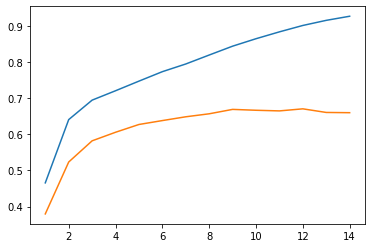

In [94]:
max_depth_arr, metric_train_arr, metric_valid_arr = check_param(min_value=1, max_value=14, model=RFR)
plt.plot(max_depth_arr, metric_train_arr)
plt.plot(max_depth_arr, metric_valid_arr)

In [95]:
np.max(metric_valid_arr)

0.6702843724000447

In [96]:
model = RFR(max_depth=10, random_state=42)
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [97]:
test = pd.read_csv('test.csv')
test = add_mean_price(test)
test['Price'] = model.predict(test.loc[:, feats])
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,mean_price,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,170796.525339,168308.008925
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,239404.300032,259584.670882
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,160075.332943,100857.060040
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,200435.243136,265152.145323
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,123349.726642,130375.436472


In [98]:
test.loc[:, ['Id', 'Price']].to_csv('ASisovski_predictions2.csv', index=None)